<a href="https://colab.research.google.com/github/Karanegi21/Fintech_project_1/blob/main/Copy_of_Karan_negi_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indicators**


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
def data_clc(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def sma(data, window):
    return data['Close'].rolling(window=window).mean()

def ema(data, span):
    return data['Close'].ewm(span=span, adjust=False).mean()

In [ ]:
symbol = 'ITC.NS'
start_date = '2023-01-01'
end_date = '2024-01-01'

[*********************100%%**********************]  1 of 1 completed


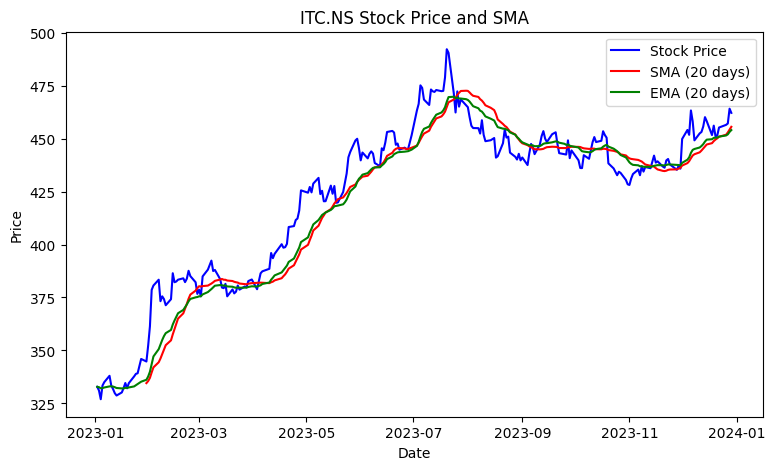

In [ ]:
stock_data = data_clc(symbol, start_date, end_date)
stock_data['SMA'] = sma(stock_data, window=20)
stock_data['EMA'] = ema(stock_data, span=20)

plt.figure(figsize=(9, 5))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA (20 days)', color='red')
plt.plot(stock_data['EMA'], label='EMA (20 days)', color='green')
plt.title(f'{symbol} Stock Price and SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

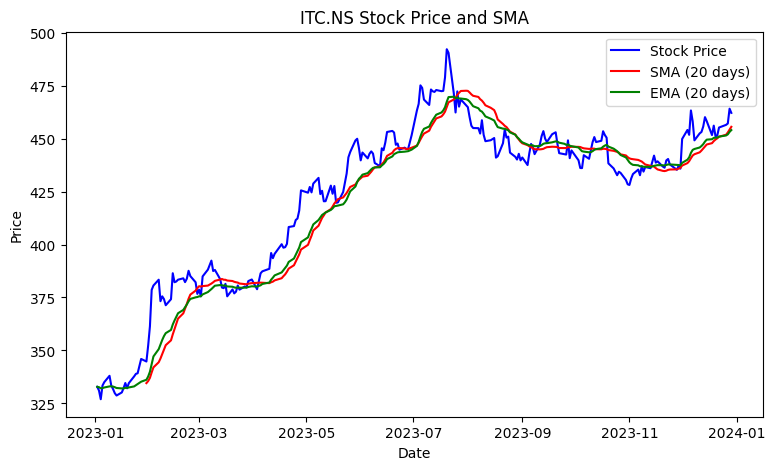

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['SMA'], label='SMA (20 days)', color='red')
plt.plot(stock_data['EMA'], label='EMA (20 days)', color='green')
plt.title(f'{symbol} Stock Price and SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
def calculate_macd(data, short_window, long_window, signal_window):
    short_ema = ema(data, short_window)
    long_ema = ema(data, long_window)
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    data['Histogram'] = data['MACD'] - data['Signal_Line']

[*********************100%%**********************]  1 of 1 completed


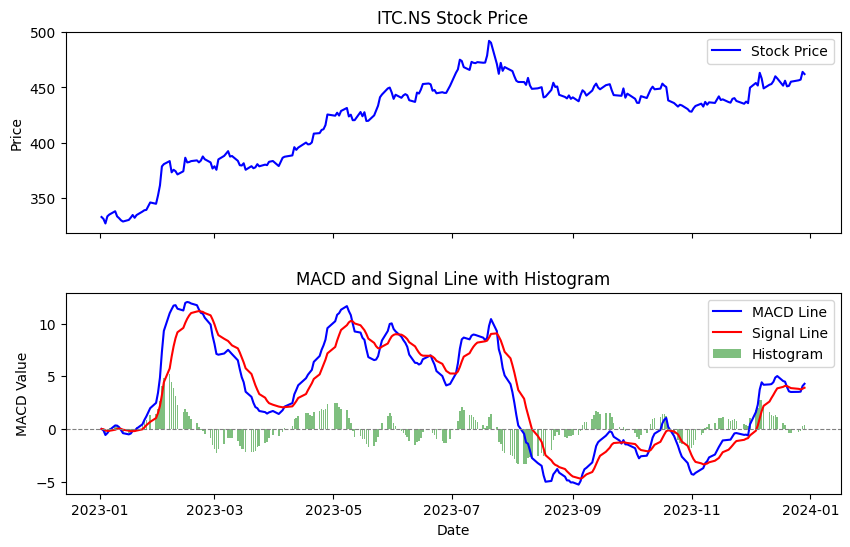

In [ ]:
stock_data = data_clc(symbol, start_date, end_date)
calculate_macd(stock_data, short_window=12, long_window=26, signal_window=9)

# Plotting MACD
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True, gridspec_kw={'hspace': 0.3})

axs[0].plot(stock_data['Close'], label='Stock Price', color='blue')
axs[0].set_title(f'{symbol} Stock Price')
axs[0].set_ylabel('Price')
axs[0].legend()

axs[1].plot(stock_data['MACD'], label='MACD Line', color='blue')
axs[1].plot(stock_data['Signal_Line'], label='Signal Line', color='red')
axs[1].bar(stock_data.index, stock_data['Histogram'], label='Histogram', color='green', alpha=0.5)
axs[1].axhline(0, color='gray', linestyle='--', linewidth=0.8)
axs[1].set_title('MACD and Signal Line with Histogram')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('MACD Value')
axs[1].legend()

**RSI**








In [ ]:
def calculate_rsi(data, window):
    price_diff = data['Close'].diff()
    gain = price_diff.where(price_diff > 0, 0)
    loss = -price_diff.where(price_diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

In [ ]:
stock_data = data_clc(symbol, start_date, end_date)
calculate_rsi(stock_data, window=14)

[*********************100%%**********************]  1 of 1 completed


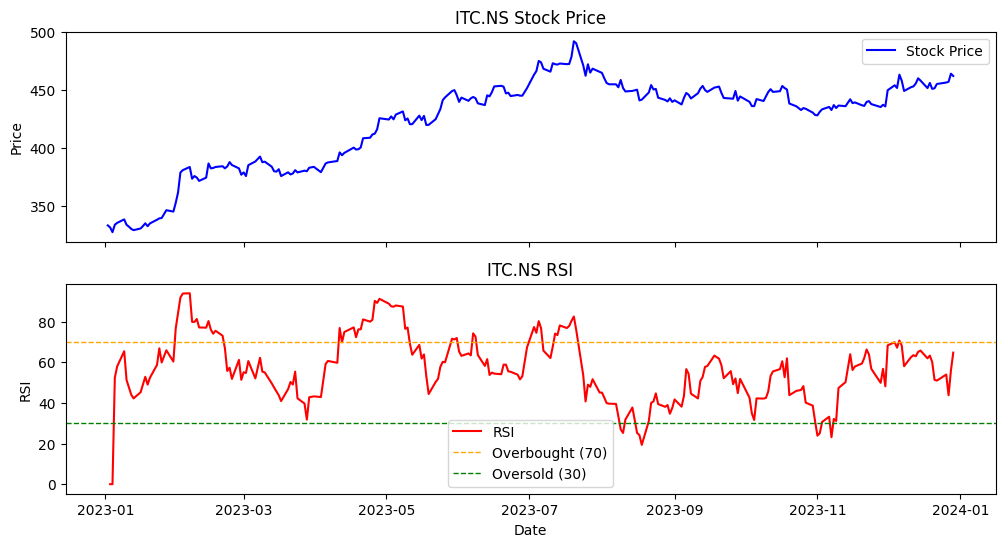

In [ ]:
# Plotting RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plotting Stock Price
ax1.plot(stock_data['Close'], label='Stock Price', color='blue')
ax1.set_title(f'{symbol} Stock Price')
ax1.set_ylabel('Price')
ax1.legend()

# Plotting RSI
ax2.plot(stock_data['RSI'], label='RSI', color='red')
ax2.axhline(70, color='orange', linestyle='--', linewidth=1, label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')

ax2.set_title(f'{symbol} RSI')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.legend()

plt.show()

**Bollinger Bands:-**

In [ ]:
def bollinger_bands(data, window, num_std_dev=2):
    sma = data['Close'].rolling(window=window).mean()
    std = data['Close'].rolling(window=window).std()
    upper_band = sma + (num_std_dev * std)
    lower_band = sma - (num_std_dev * std)
    data['Upper_Band'] = upper_band
    data['Lower_Band'] = lower_band

[*********************100%%**********************]  1 of 1 completed


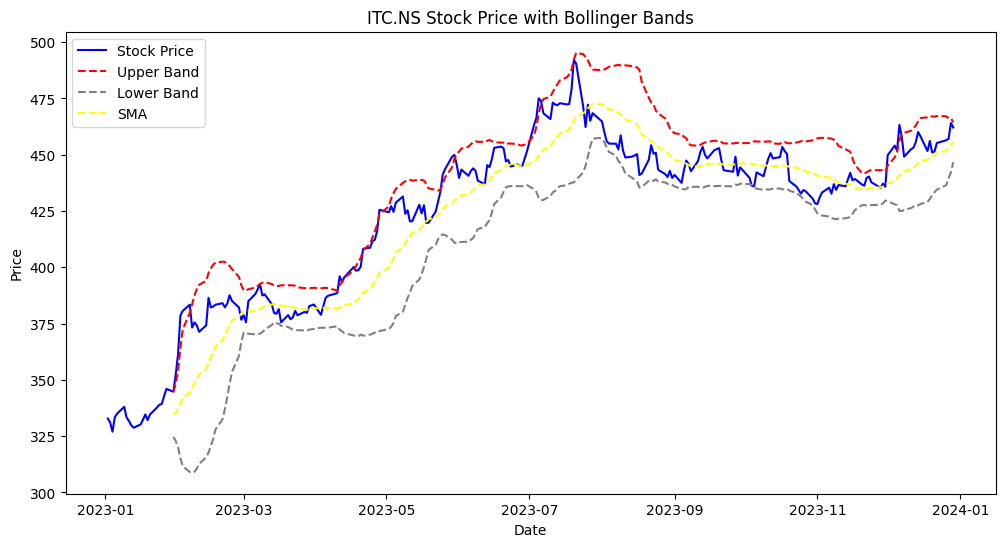

In [ ]:
stock_data = data_clc(symbol, start_date, end_date)
bollinger_bands(stock_data, window=20)
# Plotting Stock Price with Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')
plt.plot(stock_data['Upper_Band'], label='Upper Band', color='red', linestyle='--')
plt.plot(stock_data['Lower_Band'], label='Lower Band', color='grey', linestyle='--')
plt.plot(stock_data['Close'].rolling(window=20).mean(), label='SMA', color='yellow', linestyle='--')
plt.title(f'{symbol} Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()